##  Data Preprocessing(Tracking User Enagagement) – Removing Outliers

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing datasets 
data1 = pd.read_csv('minutes_watched_2021_paid_0.csv')
data2 = pd.read_csv('minutes_watched_2022_paid_0.csv')
data3 = pd.read_csv('minutes_watched_2021_paid_1.csv')
data4 = pd.read_csv('minutes_watched_2022_paid_1.csv')

#### Viewing Data

In [4]:
data1.head()

,student_id,minutes_watched,paid_in_q2
0,767,0.05,0
1,1067,0.27,0
2,1151,122.35,0
3,1571,77.60,0
4,2058,0.42,0


In [5]:
data2.head()

,student_id,minutes_watched,paid_in_q2
0,389,0.15,0
1,801,5732.58,0
2,875,46.77,0
3,1357,0.12,0
4,1373,45.92,0


In [6]:
data3.head()

,student_id,minutes_watched,paid_in_q2
0,516,46.27,1
1,520,91.18,1
2,523,1322.25,1
3,603,8.18,1
4,608,387.68,1


In [7]:
data4.head()

,student_id,minutes_watched,paid_in_q2
0,616,116.02,1
1,618,238.15,1
2,838,348.28,1
3,841,324.75,1
4,862,166.73,1


In [8]:
data1.describe

<bound method NDFrame.describe of       student_id  minutes_watched  paid_in_q2
0            767             0.05           0
1           1067             0.27           0
2           1151           122.35           0
3           1571            77.60           0
4           2058             0.42           0
...          ...              ...         ...
5329      158701             3.30           0
5330      158703             0.52           0
5331      158738             0.17           0
5332      158749            10.95           0
5333      158754             5.47           0

[5334 rows x 3 columns]>

#### Plotting the distributions

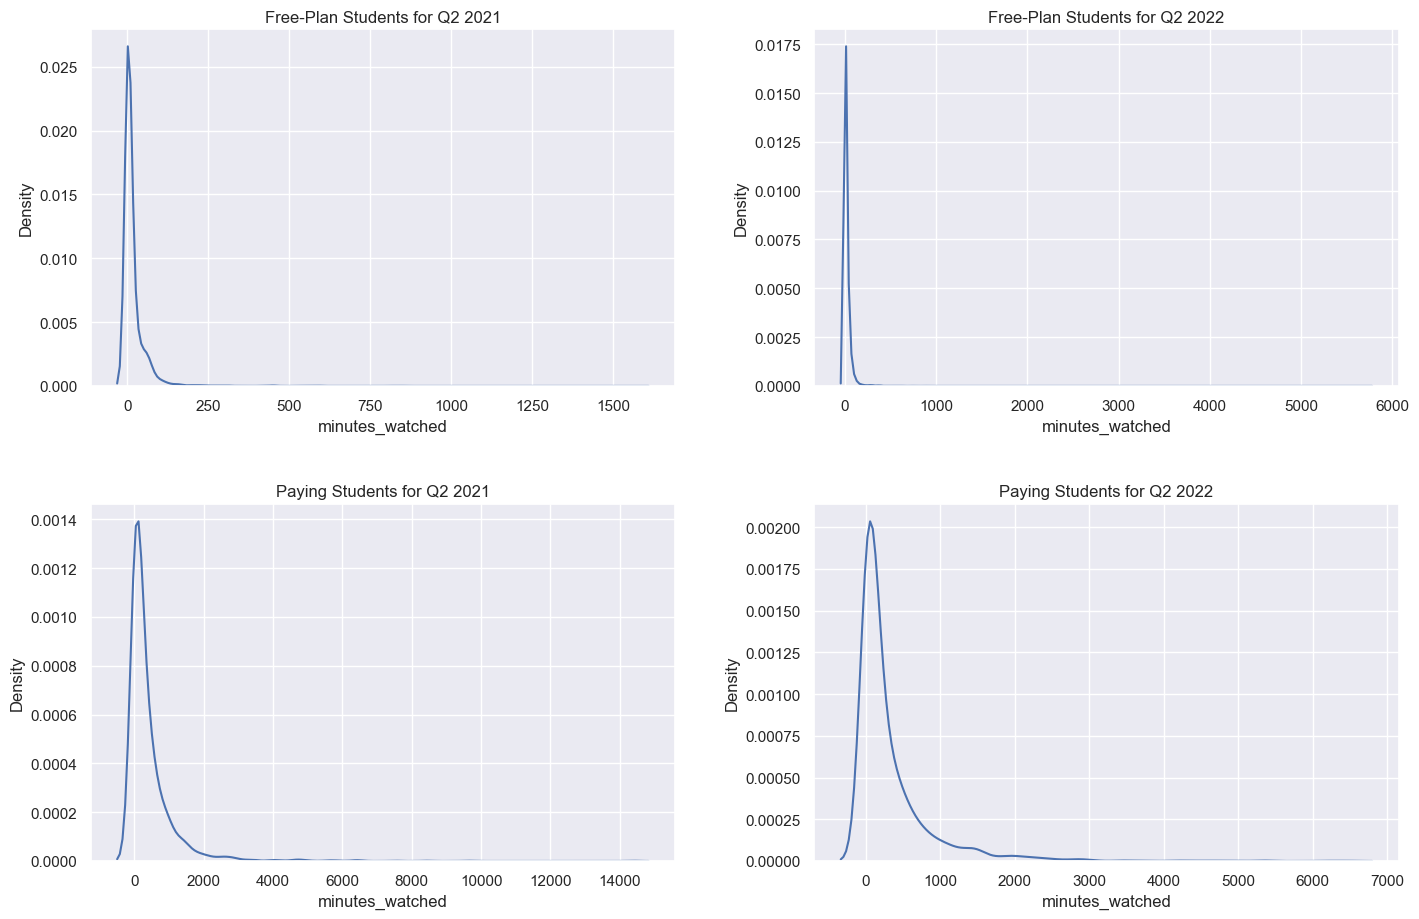

In [9]:
fig, axes = plt.subplots(2, 2, figsize =(15,10))

sns.kdeplot(data1['minutes_watched'], ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021')
sns.kdeplot(data2['minutes_watched'], ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022')
sns.kdeplot(data3['minutes_watched'], ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021')
sns.kdeplot(data4['minutes_watched'], ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022')

fig.tight_layout(pad = 3.0)

plt.show()

####  Removing the Outliers

In [10]:
# Checking for outliers
q1 = data1['minutes_watched'].quantile(0.99)
q2 = data2['minutes_watched'].quantile(0.99)
q3 = data3['minutes_watched'].quantile(0.99)
q4 = data4['minutes_watched'].quantile(0.99)

In [11]:
# Removing outliers which are outside the 99th quantile of data
data_no_outliers1 = data1[data1['minutes_watched']<q1]
data_no_outliers2 = data2[data2['minutes_watched']<q2]
data_no_outliers3 = data3[data3['minutes_watched']<q3]
data_no_outliers4 = data4[data4['minutes_watched']<q4]

#### Visualizing the filtered data

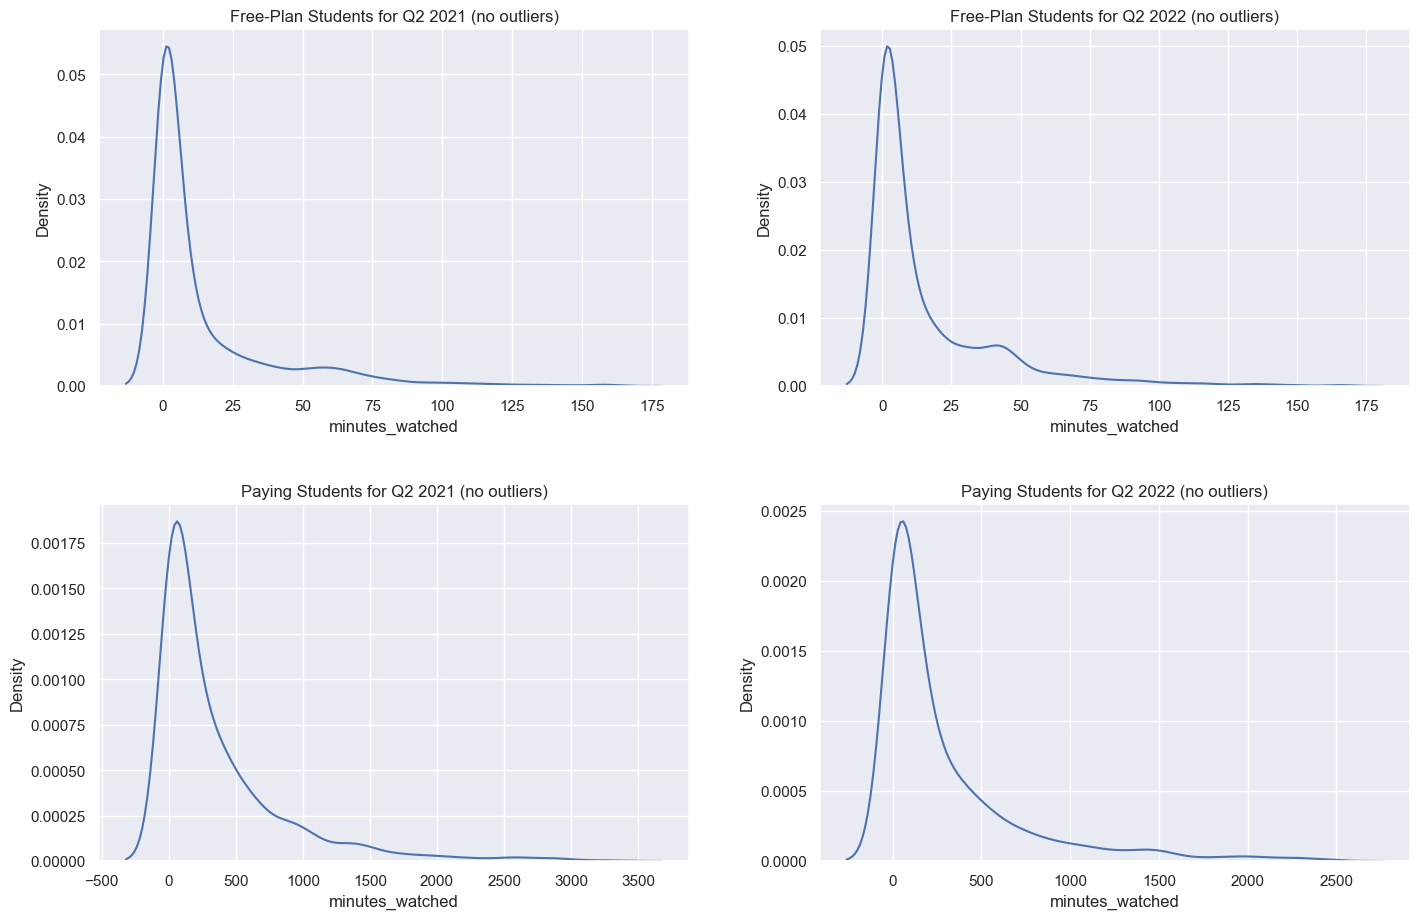

In [12]:
fig, axes = plt.subplots(2, 2, figsize =(15,10))

sns.kdeplot(data_no_outliers1['minutes_watched'], 
            ax = axes[0, 0]).set(title = 'Free-Plan Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers2['minutes_watched'], 
            ax = axes[0, 1]).set(title = 'Free-Plan Students for Q2 2022 (no outliers)')
sns.kdeplot(data_no_outliers3['minutes_watched'], 
            ax = axes[1, 0]).set(title = 'Paying Students for Q2 2021 (no outliers)')
sns.kdeplot(data_no_outliers4['minutes_watched'], 
            ax = axes[1, 1]).set(title = 'Paying Students for Q2 2022 (no outliers)')

fig.tight_layout(pad = 3.0)

plt.show();

#### Saving the data as a CSV file.

In [13]:
# saving separate csv for each categories 
data_no_outliers1.to_csv('minutes_watched_2021_paid_0_no_outliers.csv',index=False)
data_no_outliers2.to_csv('minutes_watched_2022_paid_0_no_outliers.csv',index=False)
data_no_outliers3.to_csv('minutes_watched_2021_paid_1_no_outliers.csv',index=False)
data_no_outliers4.to_csv('minutes_watched_2022_paid_1_no_outliers.csv',index=False)

#### We will continue with Hypothesis testing in excel